In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Read CSV file
df = pd.read_csv("fitness_tracker.csv")


In [5]:
# Sample questions before analysis
questions = [
    "What is the purpose of this dataset?",
    "What variables are available and what do they mean?",
    "Are there missing or duplicate values?",
    "What relationships exist between features?",
    "Which features might predict the target variable?"
]
for q in questions:
    print( q)

What is the purpose of this dataset?
What variables are available and what do they mean?
Are there missing or duplicate values?
What relationships exist between features?
Which features might predict the target variable?


In [13]:
# Shape of dataset
print("Shape of dataset:", df.shape)




Shape of dataset: (500, 21)
  User_ID        Date  Steps  Calories_Burned  Workout_Minutes Workout_Type  \
0    U009  22-03-2025  13270              535               30         Yoga   
1    U007  16-03-2025   9139              355               75       Cardio   
2    U019  22-03-2025   9945              356               30       Cardio   
3    U008  15-03-2025  12197              480                0         Yoga   
4    U019  30-03-2025   3640              102               30       Cardio   

   Sleep_Hours  Heart_Rate  Water_Intake_L       Mood  ...  Floors_Climbed  \
0          8.8          71             3.3  Energetic  ...              25   
1          7.8          78             2.2  Energetic  ...               1   
2          8.2          66             2.6      Happy  ...              15   
3          6.2          85             3.4       Calm  ...              24   
4          8.5          78             3.5      Happy  ...              11   

   Active_Minutes  Body_Temp

In [17]:
# Preview first 5 rows
print(df.head())



  User_ID        Date  Steps  Calories_Burned  Workout_Minutes Workout_Type  \
0    U009  22-03-2025  13270              535               30         Yoga   
1    U007  16-03-2025   9139              355               75       Cardio   
2    U019  22-03-2025   9945              356               30       Cardio   
3    U008  15-03-2025  12197              480                0         Yoga   
4    U019  30-03-2025   3640              102               30       Cardio   

   Sleep_Hours  Heart_Rate  Water_Intake_L       Mood  ...  Floors_Climbed  \
0          8.8          71             3.3  Energetic  ...              25   
1          7.8          78             2.2  Energetic  ...               1   
2          8.2          66             2.6      Happy  ...              15   
3          6.2          85             3.4       Calm  ...              24   
4          8.5          78             3.5      Happy  ...              11   

   Active_Minutes  Body_Temp_C  Stress_Level  Protein_In

In [18]:
# Column names and data types
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           500 non-null    object 
 1   Date              500 non-null    object 
 2   Steps             500 non-null    int64  
 3   Calories_Burned   500 non-null    int64  
 4   Workout_Minutes   500 non-null    int64  
 5   Workout_Type      500 non-null    object 
 6   Sleep_Hours       500 non-null    float64
 7   Heart_Rate        500 non-null    int64  
 8   Water_Intake_L    500 non-null    float64
 9   Mood              500 non-null    object 
 10  Distance_km       500 non-null    float64
 11  Floors_Climbed    500 non-null    int64  
 12  Active_Minutes    500 non-null    int64  
 13  Body_Temp_C       500 non-null    float64
 14  Stress_Level      500 non-null    int64  
 15  Protein_Intake_g  500 non-null    int64  
 16  Fat_Intake_g      500 non-null    int64  
 1

In [16]:
# Summary statistics of numeric columns
print(df.describe())


              Steps  Calories_Burned  Workout_Minutes  Sleep_Hours  \
count    500.000000       500.000000       500.000000   500.000000   
mean    9193.364000       367.228000        42.240000     7.024200   
std     3432.677019       138.635839        25.366697     1.150636   
min     3000.000000        95.000000         0.000000     5.000000   
25%     6097.250000       249.750000        30.000000     6.000000   
50%     9356.000000       377.500000        45.000000     7.000000   
75%    12197.000000       483.250000        60.000000     8.000000   
max    14968.000000       645.000000        75.000000     9.000000   

       Heart_Rate  Water_Intake_L  Distance_km  Floors_Climbed  \
count  500.000000      500.000000   500.000000      500.000000   
mean    79.578000        2.723800     7.354600       14.354000   
std     11.736072        0.726905     2.746477        8.583942   
min     60.000000        1.500000     2.400000        0.000000   
25%     70.000000        2.100000     4

In [19]:
print("Dataset Shape:", df.shape)   # Rows and Columns


Dataset Shape: (500, 21)


In [20]:
print("\nData Types:\n", df.dtypes)



Data Types:
 User_ID              object
Date                 object
Steps                 int64
Calories_Burned       int64
Workout_Minutes       int64
Workout_Type         object
Sleep_Hours         float64
Heart_Rate            int64
Water_Intake_L      float64
Mood                 object
Distance_km         float64
Floors_Climbed        int64
Active_Minutes        int64
Body_Temp_C         float64
Stress_Level          int64
Protein_Intake_g      int64
Fat_Intake_g          int64
Carbs_Intake_g        int64
BP_Systolic           int64
BP_Diastolic          int64
Oxygen_Level          int64
dtype: object


In [21]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 User_ID             0
Date                0
Steps               0
Calories_Burned     0
Workout_Minutes     0
Workout_Type        0
Sleep_Hours         0
Heart_Rate          0
Water_Intake_L      0
Mood                0
Distance_km         0
Floors_Climbed      0
Active_Minutes      0
Body_Temp_C         0
Stress_Level        0
Protein_Intake_g    0
Fat_Intake_g        0
Carbs_Intake_g      0
BP_Systolic         0
BP_Diastolic        0
Oxygen_Level        0
dtype: int64


In [22]:
print("\nBasic Stats:\n", df.describe())





Basic Stats:
               Steps  Calories_Burned  Workout_Minutes  Sleep_Hours  \
count    500.000000       500.000000       500.000000   500.000000   
mean    9193.364000       367.228000        42.240000     7.024200   
std     3432.677019       138.635839        25.366697     1.150636   
min     3000.000000        95.000000         0.000000     5.000000   
25%     6097.250000       249.750000        30.000000     6.000000   
50%     9356.000000       377.500000        45.000000     7.000000   
75%    12197.000000       483.250000        60.000000     8.000000   
max    14968.000000       645.000000        75.000000     9.000000   

       Heart_Rate  Water_Intake_L  Distance_km  Floors_Climbed  \
count  500.000000      500.000000   500.000000      500.000000   
mean    79.578000        2.723800     7.354600       14.354000   
std     11.736072        0.726905     2.746477        8.583942   
min     60.000000        1.500000     2.400000        0.000000   
25%     70.000000       

In [23]:
# Unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col} → {df[col].unique()}")

User_ID → ['U009' 'U007' 'U019' 'U008' 'U001' 'U004' 'U021' 'U017' 'U018' 'U023'
 'U025' 'U015' 'U014' 'U003' 'U016' 'U020' 'U005' 'U010' 'U022' 'U012'
 'U011' 'U002' 'U013' 'U006' 'U024']
Date → ['22-03-2025' '16-03-2025' '15-03-2025' '30-03-2025' '20-03-2025'
 '28-03-2025' '17-03-2025' '21-03-2025' '26-03-2025' '23-03-2025'
 '01-04-2025' '31-03-2025' '29-03-2025' '25-03-2025' '27-03-2025'
 '19-03-2025' '24-03-2025' '18-03-2025' '03-04-2025' '02-04-2025']
Workout_Type → ['Yoga' 'Cardio' 'Strength' 'Rest']
Mood → ['Energetic' 'Happy' 'Calm' 'Tired' 'Stressed']


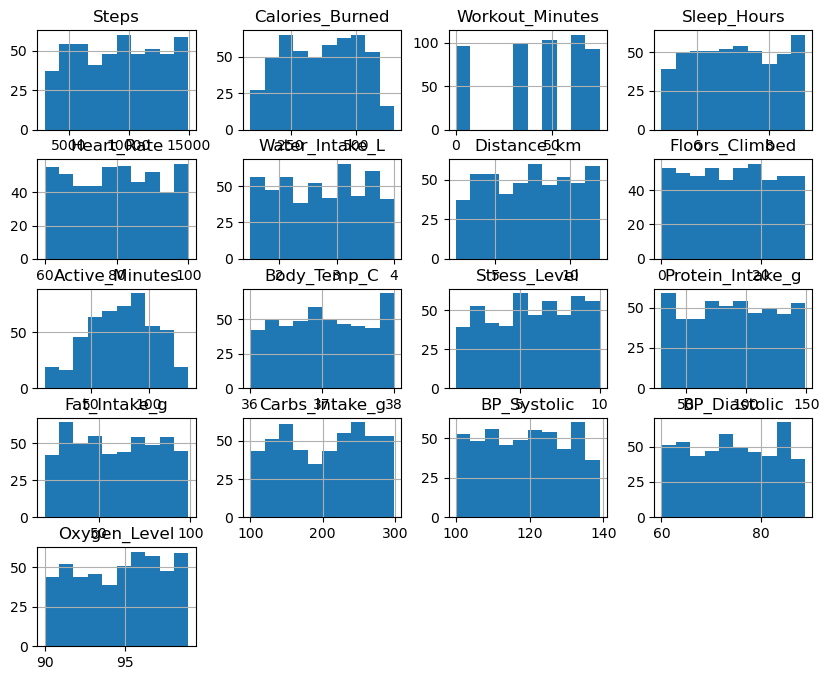

In [25]:


# Histogram of each numerical feature
df.hist(figsize=(10, 8))
plt.show()



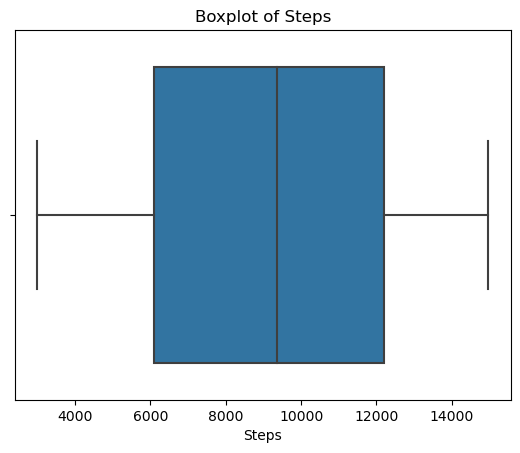

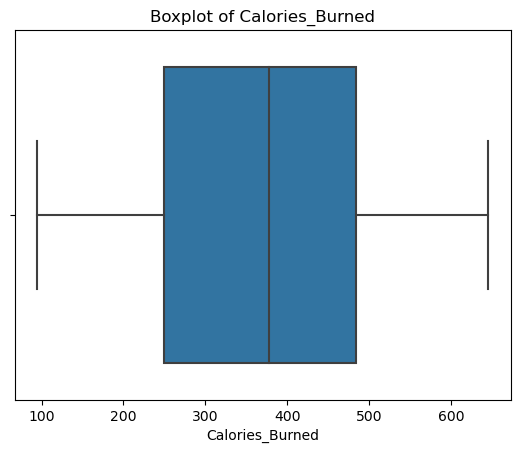

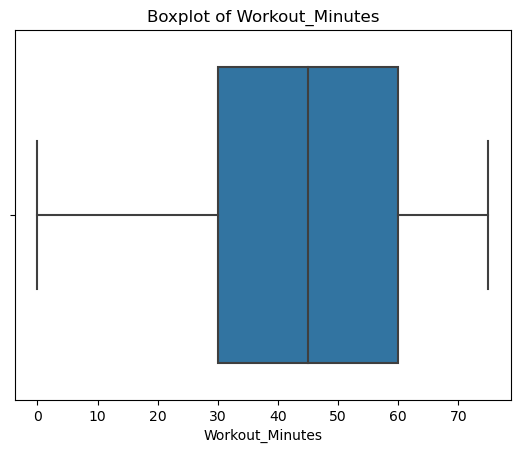

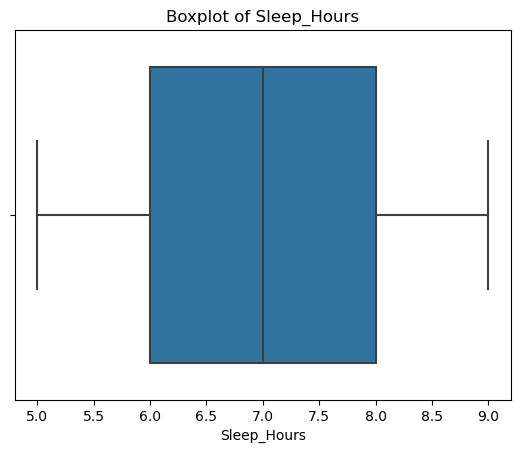

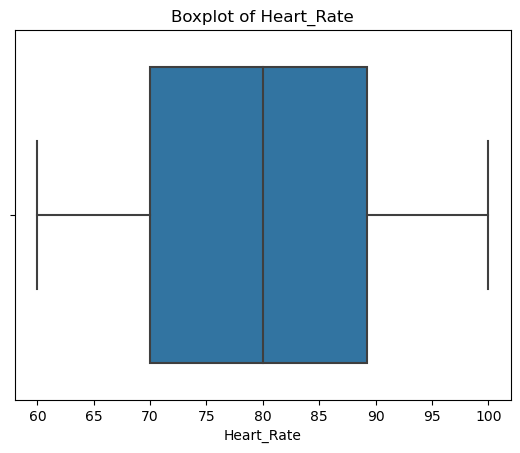

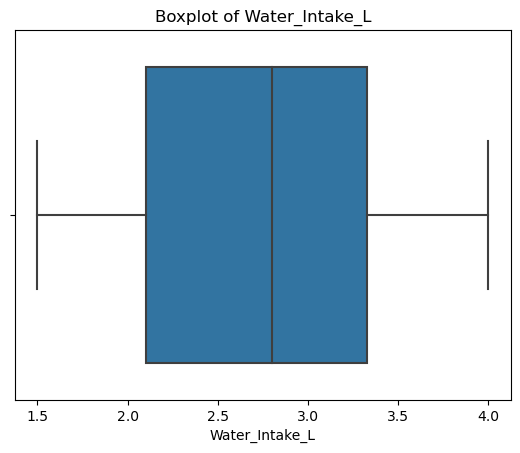

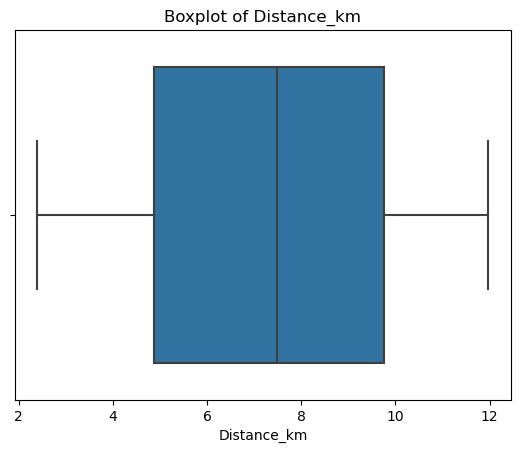

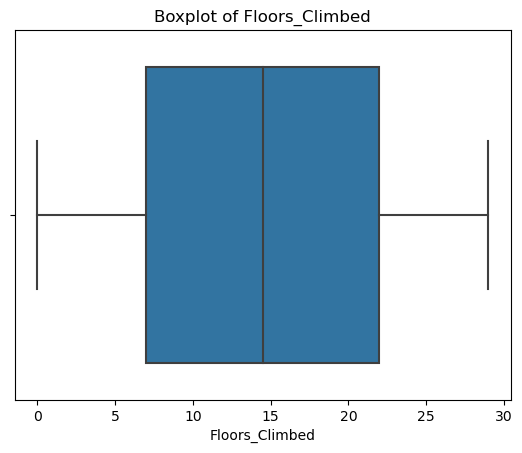

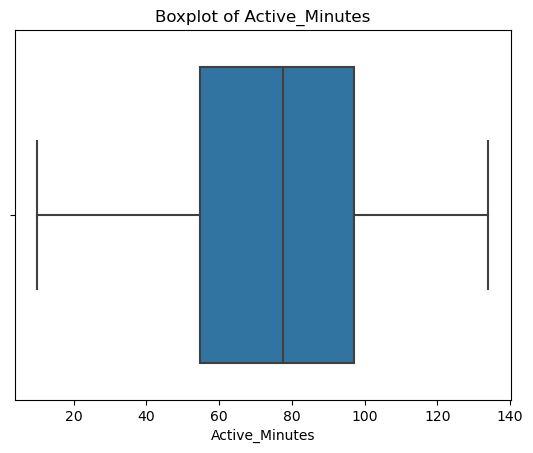

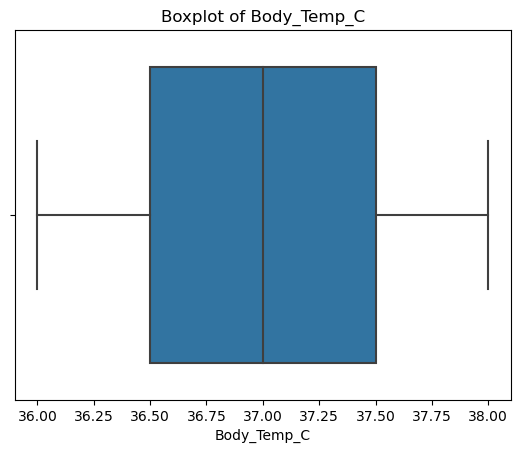

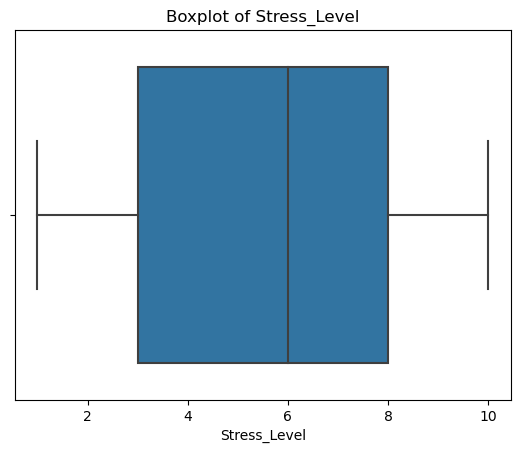

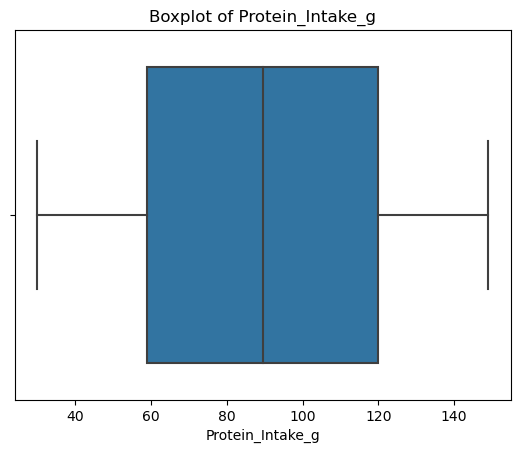

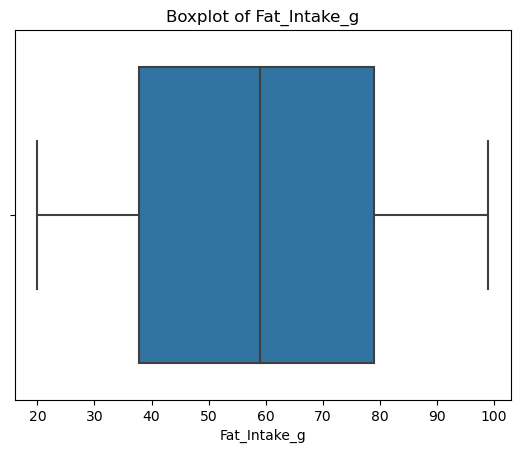

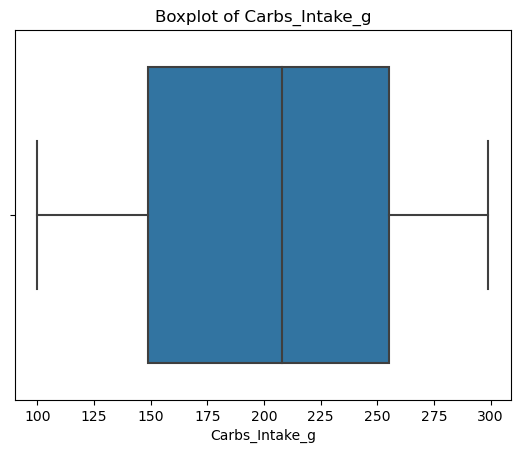

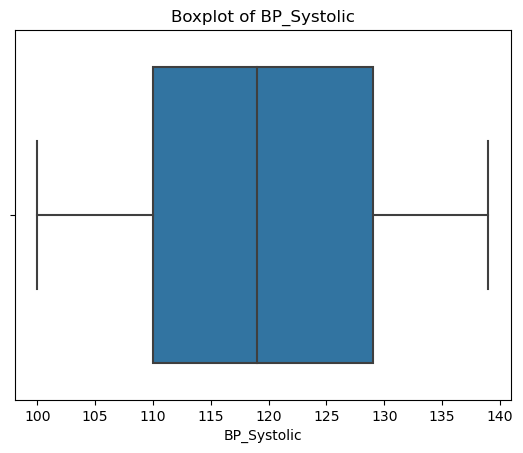

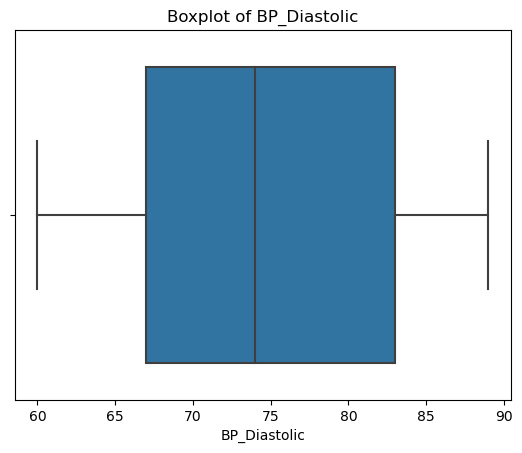

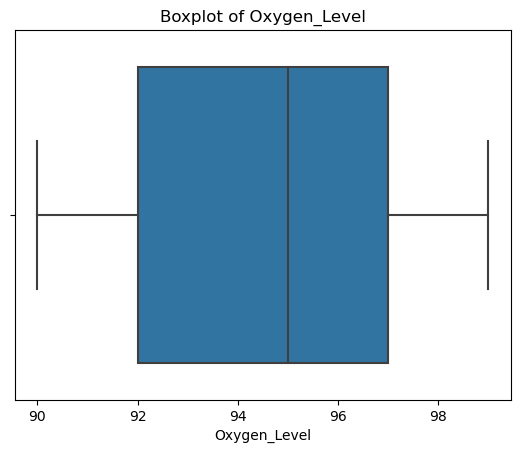

In [26]:
# Boxplot to detect outliers
for col in df.select_dtypes(include='number'):
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



C:\Users\reddy\AppData\Local\Temp\ipykernel_18368\1965938737.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


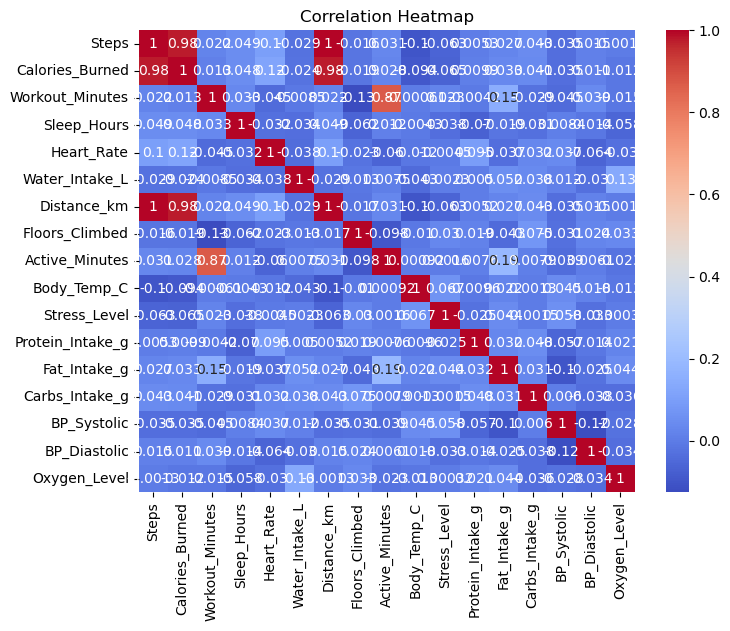

In [27]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [32]:
from scipy.stats import ttest_ind

# Example hypothesis test: Compare means of two groups
group1 = df[df['Steps'] == 10000]['Calories_Burned']
group2 = df[df['Steps'] == 5000]['Calories_Burned']


t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference between groups")
else:
    print(" No significant difference between groups")


T-statistic: nan
P-value: nan
 No significant difference between groups


In [15]:
# Unique values for each column
for col in df.columns:
    print(f"{col} → {df[col].nunique()} unique values")


User_ID → 25 unique values
Date → 20 unique values
Steps → 490 unique values
Calories_Burned → 316 unique values
Workout_Minutes → 5 unique values
Workout_Type → 4 unique values
Sleep_Hours → 41 unique values
Heart_Rate → 41 unique values
Water_Intake_L → 26 unique values
Mood → 5 unique values
Distance_km → 393 unique values
Floors_Climbed → 30 unique values
Active_Minutes → 117 unique values
Body_Temp_C → 21 unique values
Stress_Level → 10 unique values
Protein_Intake_g → 119 unique values
Fat_Intake_g → 80 unique values
Carbs_Intake_g → 182 unique values
BP_Systolic → 40 unique values
BP_Diastolic → 30 unique values
Oxygen_Level → 10 unique values


In [11]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert data types if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check outliers using IQR method
for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col} → {len(outliers)} outliers detected")


Missing values per column:
 User_ID             0
Date                0
Steps               0
Calories_Burned     0
Workout_Minutes     0
Workout_Type        0
Sleep_Hours         0
Heart_Rate          0
Water_Intake_L      0
Mood                0
Distance_km         0
Floors_Climbed      0
Active_Minutes      0
Body_Temp_C         0
Stress_Level        0
Protein_Intake_g    0
Fat_Intake_g        0
Carbs_Intake_g      0
BP_Systolic         0
BP_Diastolic        0
Oxygen_Level        0
dtype: int64
Steps → 0 outliers detected
Calories_Burned → 0 outliers detected
Workout_Minutes → 0 outliers detected
Sleep_Hours → 0 outliers detected
Heart_Rate → 0 outliers detected
Water_Intake_L → 0 outliers detected
Distance_km → 0 outliers detected
Floors_Climbed → 0 outliers detected
Active_Minutes → 0 outliers detected
Body_Temp_C → 0 outliers detected
Stress_Level → 0 outliers detected
Protein_Intake_g → 0 outliers detected
Fat_Intake_g → 0 outliers detected
Carbs_Intake_g → 0 outliers detected
B

C:\Users\reddy\AppData\Local\Temp\ipykernel_18368\1393970892.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
